In [1]:
# Initiating and Loading Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

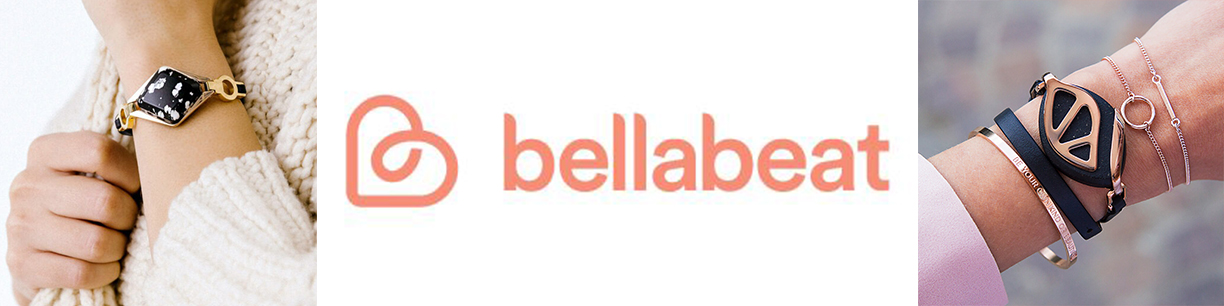

## 1. Context

Bellabeat is a health and wellness technology company that focuses on women's health tracking.  This company was founded in 2013 by Urška Sršen and Sando Mur. The company creates smart jewelry, fitness trackers, and wellness apps designed to help women monitor various health metrics, including activity, sleep, stress, and menstrual cycles.

In this case study we will use the data analysis process that consist of **ask, prepare, process, analyze, share,** and **act** to gain insights for company growth.

## 2. Ask phase

### 2.1 Business tasks
* To identify customer trends smart device usage 
* To apply smart device usage insights in improving bellabeat customer experience

### 2.2 Key stakeholders

* Urška Sršen: Bellabeat cofounder and Chief Creative Officer
* Sando Mur: Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team
* Bellabeat Customers

## 3. Prepare Phase

### 3.1 Dataset source
The data is originated from FitBit Fitness tracker dataset that have been made available through Mobius. It contains personal fitness tracker data from over thirty FitBit users who have given consent to use their data.

### 3.2 Accessibility and privacy of data
The available data for this project is open-source. We can copy, modify, distribute and perform the work without asking permission from the data owner.

### 3.3 Data organization and verification
There are 18 CSV files available for us. All files represent different quantitative data produced by FitBit technology. You can see those files in table below.

#### Data organization and verification

| Table Name                        | Type                   | Description |
|------------------------------------|------------------------|-------------|
| dailyActivity_merged              | Microsoft Excel CSV    | Daily Activity over 31 days of 33 users. Tracking daily: Steps, Distance, Intensities, Calories |
| dailyCalories_merged              | Microsoft Excel CSV    | Daily Calories over 31 days of 33 users |
| dailyIntensities_merged           | Microsoft Excel CSV    | Daily Intensity over 31 days of 33 users. Measured in Minutes and Distance, dividing groups in 4 categories: Sedentary, Lightly Active, Fairly Active, Very Active |
| dailySteps_merged                 | Microsoft Excel CSV    | Daily Steps over 31 days of 33 users |
| heartrate_seconds_merged          | Microsoft Excel CSV    | Exact day and time heartrate logs for just 7 users |
| hourlyCalories_merged             | Microsoft Excel CSV    | Hourly Calories burned over 31 days of 33 users |
| hourlyIntensities_merged          | Microsoft Excel CSV    | Hourly total and average intensity over 31 days of 33 users |
| hourlySteps_merged                | Microsoft Excel CSV    | Hourly Steps over 31 days of 33 users |
| minuteCaloriesNarrow_merged       | Microsoft Excel CSV    | Calories burned every minute over 31 days of 33 users (Every minute in single row) |
| minuteCaloriesWide_merged         | Microsoft Excel CSV    | Calories burned every minute over 31 days of 33 users (Every minute in single column) |
| minuteIntensitiesNarrow_merged    | Microsoft Excel CSV    | Intensity counted by minute over 31 days of 33 users (Every minute in single row) |
| minuteIntensitiesWide_merged      | Microsoft Excel CSV    | Intensity counted by minute over 31 days of 33 users (Every minute in single column) |
| minuteMETsNarrow_merged           | Microsoft Excel CSV    | Ratio of the energy you are using in a physical activity compared to the energy you would use at rest. Counted in minutes |
| minuteSleep_merged                | Microsoft Excel CSV    | Log Sleep by Minute for 24 users over 31 days. Value column not specified |
| minuteStepsNarrow_merged          | Microsoft Excel CSV    | Steps tracked every minute over 31 days of 33 users (Every minute in single row) |
| minuteStepsWide_merged            | Microsoft Excel CSV    | Steps tracked every minute over 31 days of 33 users (Every minute in single column) |
| sleepDay_merged                   | Microsoft Excel CSV    | Daily sleep logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in Bed |
| weightLogInfo_merged              | Microsoft Excel CSV    | Weight tracked by day in Kg and Pounds over 30 days. Calculation of BMI. 5 users report weight manually, 3 users do not. In total, there are 8 users |


### 3.4 Data Credibility

We have sample size greater than 30. This is relatively reliable enough for sample size according to this [reference](https://reviews.tn/wiki/why-is-30-a-good-sample-size/).

## 4. Process phase

### 4.1 Data understanding

**Importing libraries**

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style
plt.style.use('ggplot')

# other display option
import warnings
warnings.filterwarnings('ignore') # Ignore warning

pd.set_option('display.max_columns', None)  # Show all columns

**Loading datasets**

In [3]:
# Loading the selected dataset
daily_activity = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_steps = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
hourly_calories = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
sleepday = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
daily_calories = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensity = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
weight_log = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
daily_steps = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
heartrate_secs = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

### 4.2 Data exploration

In [4]:
# Quick review of daily activity dataframe
print(f'daily_activity dataframe contains {len(daily_activity)} rows')
print('')
display(daily_activity.head(3), daily_activity.tail(3))

daily_activity dataframe contains 940 rows



,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.0,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.0,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.0,23,1,137,770,1849


In [5]:
# Quick review of hourly_steps dataframe
print(f'hourly_steps dataframe contains {len(hourly_steps)} rows')
print('')
display(hourly_steps.head(3), hourly_steps.tail(3))

hourly_steps dataframe contains 22099 rows



,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151


,Id,ActivityHour,StepTotal
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307
22098,8877689391,5/12/2016 2:00:00 PM,457


In [6]:
# Quick review of hourly_calories dataframe
print(f'hourly_calories dataframe contains {len(hourly_calories)} rows')
print('')
display(hourly_calories.head(3),hourly_calories.tail(3))

hourly_calories dataframe contains 22099 rows



,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59


,Id,ActivityHour,Calories
22096,8877689391,5/12/2016 12:00:00 PM,321
22097,8877689391,5/12/2016 1:00:00 PM,101
22098,8877689391,5/12/2016 2:00:00 PM,113


In [7]:
# Quick review of sleepday dataframe
print(f'sleepday dataframe contains {len(sleepday)} rows')
print('')
display(sleepday.head(3),sleepday.tail(3))

sleepday dataframe contains 413 rows



,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545
412,8792009665,5/4/2016 12:00:00 AM,1,439,463


In [8]:
# Quick review of daily_calories dataframe
print(f'daily_calories dataframe contains {len(daily_calories)} rows')
print('')
display(daily_calories.head(3),daily_calories.tail(3))

daily_calories dataframe contains 940 rows



,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776


,Id,ActivityDay,Calories
937,8877689391,5/10/2016,2832
938,8877689391,5/11/2016,3832
939,8877689391,5/12/2016,1849


In [9]:
# Quick review of daily_intensity dataframe
print(f'daily_intensity dataframe contains {len(daily_intensity)} rows')
print('')
display(daily_intensity.head(3),daily_intensity.tail(3))

daily_intensity dataframe contains 940 rows



,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
937,8877689391,5/10/2016,1187,224,11,18,0.0,6.28,0.46,1.35
938,8877689391,5/11/2016,1127,213,12,88,0.0,5.89,0.41,13.22
939,8877689391,5/12/2016,770,137,1,23,0.0,4.25,0.04,1.82


In [10]:
# Quick review of weight_log dataframe
print(f'weight_log dataframe contains {len(weight_log)} rows')
print('')
display(weight_log.head(3),weight_log.tail(3))

weight_log dataframe contains 67 rows



,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000
66,8877689391,5/12/2016 6:42:53 AM,84.000000,185.188300,NaN,25.139999,False,1463035373000


In [11]:
# Quick review of daily_steps dataframe
print(f'daily_steps dataframe contains {len(daily_steps)} rows')
print('')
display(daily_steps.head(3),daily_steps.tail(3))

daily_steps dataframe contains 940 rows



,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460


,Id,ActivityDay,StepTotal
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420
939,8877689391,5/12/2016,8064


In [12]:
# Quick review of heartrate_secs dataframe
print(f'heartrate_secs dataframe contains {len(heartrate_secs)} rows')
print('')
display(heartrate_secs.head(3),heartrate_secs.tail(3))

heartrate_secs dataframe contains 2483658 rows



,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105


,Id,Time,Value
2483655,8877689391,5/12/2016 2:44:03 PM,55
2483656,8877689391,5/12/2016 2:44:18 PM,55
2483657,8877689391,5/12/2016 2:44:28 PM,56


In [13]:
# List of dataframes and their columns

from prettytable import PrettyTable

# List of DataFrames
dataframes = {
    "Daily Activity": daily_activity,
    "Hourly Steps": hourly_steps,
    "Hourly Calories": hourly_calories,
    "Sleepday": sleepday,
    "Daily Calories": daily_calories,
    "Daily Intensity": daily_intensity,
    "Weight Log": weight_log,
    "Daily Steps": daily_steps,
    "Heart Rate": heartrate_secs
}

# Create PrettyTable
table = PrettyTable()
table.field_names = ["DataFrame Name", "Total Columns", "Columns"]

# Add data to table
for name, df in dataframes.items():
    table.add_row([name, len(df.columns), ", ".join(df.columns)])

# Display the table
table


DataFrame Name,Total Columns,Columns
Daily Activity,15,"Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories"
Hourly Steps,3,"Id, ActivityHour, StepTotal"
Hourly Calories,3,"Id, ActivityHour, Calories"
Sleepday,5,"Id, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed"
Daily Calories,3,"Id, ActivityDay, Calories"
Daily Intensity,10,"Id, ActivityDay, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance"
Weight Log,8,"Id, Date, WeightKg, WeightPounds, Fat, BMI, IsManualReport, LogId"
Daily Steps,3,"Id, ActivityDay, StepTotal"
Heart Rate,3,"Id, Time, Value"


Now, we want to see how many users participated in each dataset. We can check from the Id column.

In [14]:
# Data dimension/shape and unique users
for name, df in dataframes.items():
    print(f"{name} Dataset: {df.shape[0]} rows, {df.shape[1]} columns | {df.Id.nunique()} unique users")

Daily Activity Dataset: 940 rows, 15 columns | 33 unique users
Hourly Steps Dataset: 22099 rows, 3 columns | 33 unique users
Hourly Calories Dataset: 22099 rows, 3 columns | 33 unique users
Sleepday Dataset: 413 rows, 5 columns | 24 unique users
Daily Calories Dataset: 940 rows, 3 columns | 33 unique users
Daily Intensity Dataset: 940 rows, 10 columns | 33 unique users
Weight Log Dataset: 67 rows, 8 columns | 8 unique users
Daily Steps Dataset: 940 rows, 3 columns | 33 unique users
Heart Rate Dataset: 2483658 rows, 3 columns | 14 unique users


Let's review the data type of each dataset and their data summary

In [15]:
# daily_activity data type # data summary
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [16]:
# hourly_steps data type # data summary
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [17]:
# hourly_calories data type # data summary
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [18]:
# sleepday data type # data summary
sleepday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [19]:
# daily_calories data type # data summary
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [20]:
# daily_intensity data type # data summary
daily_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [21]:
# weight_log data type # data summary
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [22]:
# daily_steps data type # data summary
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [23]:
# heartrate_secs data type # data summary
heartrate_secs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


### 4.3 Data cleaning

In [24]:
# Missing values
# Loop through each DataFrame and print missing value count
for name, df in dataframes.items():
    missing_values = df.isna().values.sum()
    print(f"{name} Dataset has {missing_values} missing values")

Daily Activity Dataset has 0 missing values
Hourly Steps Dataset has 0 missing values
Hourly Calories Dataset has 0 missing values
Sleepday Dataset has 0 missing values
Daily Calories Dataset has 0 missing values
Daily Intensity Dataset has 0 missing values
Weight Log Dataset has 65 missing values
Daily Steps Dataset has 0 missing values
Heart Rate Dataset has 0 missing values


Weight_log dataset contains some missing values. We will explore them.

In [25]:
# Missing values
# Displaying rows with missing value
missing_rows = weight_log[weight_log.isnull().any(axis=1)]
missing_rows

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
6,4319703577,5/4/2016 11:59:59 PM,72.300003,159.394222,NaN,27.379999,True,1462406399000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In weight_log dataframe, there are 65 rows of total 67 rows contain missing values. We will explore more using missingno library to find the distribution of missing values.

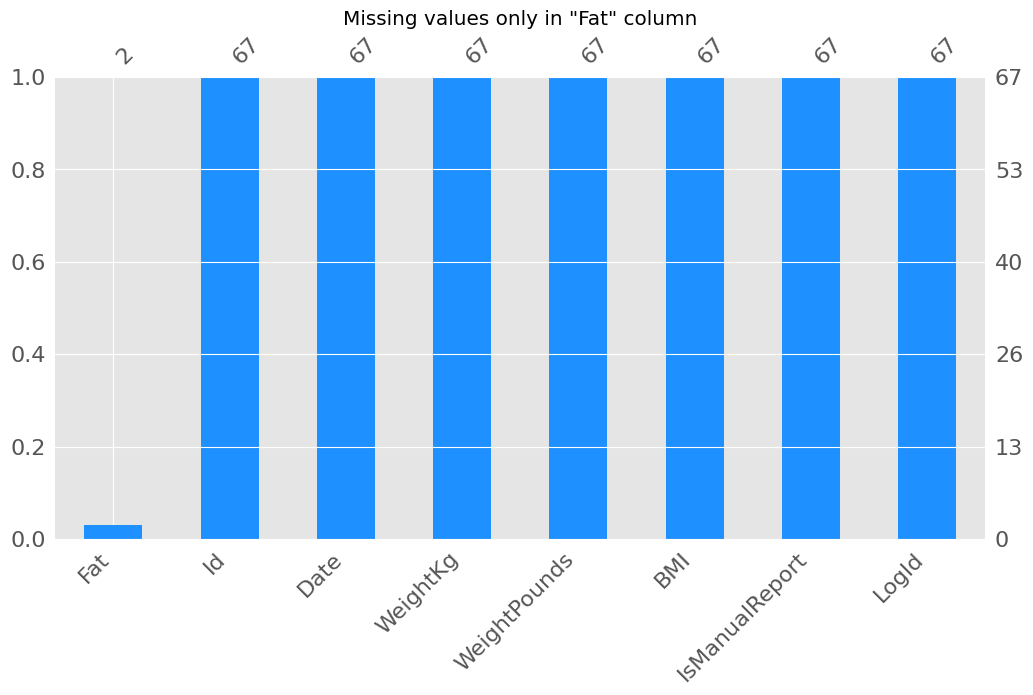

In [26]:
# Visualization of data proportion and missing values
import missingno
missingno.bar(weight_log, color="dodgerblue", sort="ascending", figsize=(12,6))
plt.title('Missing values only in "Fat" column')
plt.show()

The 'Fat' column is the only column in weight_log dataframe that contains high number missing values. In contrast, the other colums do not contain any missing values. Hence, we will drop this column.

In [27]:
# Drop column
weight_log = weight_log.drop(columns=['Fat'])

In [28]:
# Sanity check in weight log dataframe
print('total missing values in weight_log dataframe:', weight_log.isna().values.sum())
weight_log.isna().sum().to_frame('Missing values')

total missing values in weight_log dataframe: 0


,Missing values
Id,0
Date,0
WeightKg,0
WeightPounds,0
BMI,0
IsManualReport,0
LogId,0


In [29]:
# Sanity check on all dataframe
print("Daily Activity Dataframe has",daily_activity.isnull().values.sum(), "missing values")
print("Hourly Steps Dataframe has",hourly_steps.isnull().values.sum(), "missing values")
print("Hourly Calories Dataframe has",hourly_calories.isnull().values.sum(), "missing values")
print("SleepDay Dataframe has",sleepday.isnull().values.sum(), "missing values")
print("Daily Calories Dataframe has",daily_calories.isnull().values.sum(), "missing values")  
print("Daily Intensity Dataframe has",daily_intensity.isnull().values.sum(), "missing values")
print("Daily Steps Dataframe has",daily_steps.isnull().values.sum(), "missing values")
print("Heart Rate Dataframe has",heartrate_secs.isnull().values.sum(), "missing values")
print("Weight log Dataframe has",weight_log.isnull().values.sum(), "missing values")

Daily Activity Dataframe has 0 missing values
Hourly Steps Dataframe has 0 missing values
Hourly Calories Dataframe has 0 missing values
SleepDay Dataframe has 0 missing values
Daily Calories Dataframe has 0 missing values
Daily Intensity Dataframe has 0 missing values
Daily Steps Dataframe has 0 missing values
Heart Rate Dataframe has 0 missing values
Weight log Dataframe has 0 missing values


We have treated the missing values in the 'weight_log' dataframe. Now all of our dataframe do not contain missing values.

In [30]:
# Duplicated data
# Loop through each DataFrame and print duplicated data
for name, df in dataframes.items():
    duplicated_data = df.duplicated().values.sum()
    print(f"{name} Dataset has {duplicated_data} duplicate")

Daily Activity Dataset has 0 duplicate
Hourly Steps Dataset has 0 duplicate
Hourly Calories Dataset has 0 duplicate
Sleepday Dataset has 3 duplicate
Daily Calories Dataset has 0 duplicate
Daily Intensity Dataset has 0 duplicate
Weight Log Dataset has 0 duplicate
Daily Steps Dataset has 0 duplicate
Heart Rate Dataset has 0 duplicate


In [31]:
# Duplicated rows
duplicated_rows = sleepday[sleepday.duplicated()]
duplicated_rows

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


We have duplicates in sleepday dataset and we will drop those duplicates.

In [32]:
# Dropping duplicates in sleepday dataframe
sleepday = sleepday.drop_duplicates(keep='last', ignore_index=True)

In [33]:
# Sanity check
sleepday.duplicated().values.sum()

0

In [34]:
# Sanity check on all dataframe
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().values.sum())
print("Duplicates in Hourly Steps: ", hourly_steps.duplicated().values.sum())
print("Duplicates in Hourly Calories: ", hourly_calories.duplicated().values.sum())
print("Duplicates in Sleepday: ", sleepday.duplicated().values.sum())
print("Duplicates in Daily Calories: ", daily_calories.duplicated().values.sum())  
print("Duplicates in Daily Intensity: ", daily_intensity.duplicated().values.sum())
print("Duplicates in Daily Steps: ", daily_steps.duplicated().values.sum())
print("Duplicates in Heart Rate: ", heartrate_secs.duplicated().values.sum())
print("Duplicates in Weight log: ", weight_log.duplicated().values.sum())

Duplicates in Daily Acitivity:  0
Duplicates in Hourly Steps:  0
Duplicates in Hourly Calories:  0
Duplicates in Sleepday:  0
Duplicates in Daily Calories:  0
Duplicates in Daily Intensity:  0
Duplicates in Daily Steps:  0
Duplicates in Heart Rate:  0
Duplicates in Weight log:  0


We have eliminated the duplicates.

**Initial findings**

* Based on all datasets we have checked, we have some datasets that contains less than 30 observations or unique users such as sleepday (24 users), weight_log (8 users), and heartrate_secs (14 users). We might have to omit them.
* There are some columns in the datasets that considered as 'objects' instead of 'datetime' data type. We need to convert them.
* We have observed that there are missing values in 'weight_log' dataset and duplicates in 'sleepday' dataset. However, we have treated them in previous steps. 

### 4.4 Data pre-processing

In this step, we need to pre-process some data into a format that can be easily analyzed. What we can do consist of,

* Converting data type into the right format file (e.g., object into datetime).
* Modifying some features or columns into similar format in other dataframes.
* Merging some dataframe into one for easier analysis.


In [35]:
# Data pre-processing
# Converting data type
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

In [36]:
# Checking
print("Daily Acitivity data type:", daily_activity["ActivityDate"].dtypes, "data type")
print("Hourly Steps data type:", hourly_steps["ActivityHour"].dtypes, "data type")
print("Hourly Calories data type:", hourly_calories["ActivityHour"].dtypes, "data type")
print("Sleepday data type is: ", sleepday["SleepDay"].dtypes, "data type")

Daily Acitivity data type: datetime64[ns] data type
Hourly Steps data type: datetime64[ns] data type
Hourly Calories data type: datetime64[ns] data type
Sleepday data type is:  datetime64[ns] data type


These columns have been converted into datetime data type.

**Merging data**

Now, we will merging data of 'hourly_steps' and 'hourly_calories' since both of them have similar dimensions (22099, 3).

In [37]:
# Checking data before merging
print(hourly_steps.columns)
print(hourly_calories.columns)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


In [38]:
# Merging hourly_steps and hourly_calories
merge_steps_calories = pd.merge(hourly_steps, hourly_calories, on=['Id', 'ActivityHour'], how = 'inner')
merge_steps_calories.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


In [39]:
# Re-check the new dataframe format
print(f'The merge_steps_calories dataset contains {merge_steps_calories.shape[0]} rows and {merge_steps_calories.shape[1]} columns ')
print('')
merge_steps_calories.info()

The merge_steps_calories dataset contains 22099 rows and 4 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   StepTotal     22099 non-null  int64         
 3   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 690.7 KB


Now we need to make some changes on merge_steps_calories dataset by adding new column of 'DateHour'. We can extract it from the 'ActivityHour' column


In [40]:
# Adding column
merge_steps_calories["DateHour"] = merge_steps_calories["ActivityHour"].dt.hour

# Checking changes
merge_steps_calories.head()

,Id,ActivityHour,StepTotal,Calories,DateHour
0,1503960366,2016-04-12 00:00:00,373,81,0
1,1503960366,2016-04-12 01:00:00,160,61,1
2,1503960366,2016-04-12 02:00:00,151,59,2
3,1503960366,2016-04-12 03:00:00,0,47,3
4,1503960366,2016-04-12 04:00:00,0,48,4


In [41]:
# Making ActivityDay column
merge_steps_calories['ActivityDay'] = merge_steps_calories["ActivityHour"].dt.date
merge_steps_calories['ActivityDay'] = pd.to_datetime(merge_steps_calories['ActivityDay'])
#merge_steps_calories = merge_steps_calories.drop("ActivityHour", axis = 1)
merge_steps_calories.head()

,Id,ActivityHour,StepTotal,Calories,DateHour,ActivityDay
0,1503960366,2016-04-12 00:00:00,373,81,0,2016-04-12
1,1503960366,2016-04-12 01:00:00,160,61,1,2016-04-12
2,1503960366,2016-04-12 02:00:00,151,59,2,2016-04-12
3,1503960366,2016-04-12 03:00:00,0,47,3,2016-04-12
4,1503960366,2016-04-12 04:00:00,0,48,4,2016-04-12


Now, we want to merge merge_steps_calories dataset with sleepday dataset to contain sleepday record with calories for next analysis. To merge it, we need to change the column name of 'sleepday' to match 'ActivityDay' in merge_step_calories dataset.

In [42]:
# Renaming column
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [43]:
# Checking data before merging
print('Columns of merge_steps_calories dataset:', merge_steps_calories.columns)
print()

print('Columns of sleepday dataset: ', sleepday.columns)

Columns of merge_steps_calories dataset: Index(['Id', 'ActivityHour', 'StepTotal', 'Calories', 'DateHour',
       'ActivityDay'],
      dtype='object')

Columns of sleepday dataset:  Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')


Since they have 'Id', 'ActivityDay' and 'WeekDay' in common, we'll merge both dataframes on 'Id', 'ActivityDay' and 'WeekDay'.

In [44]:
print("Unique users in steps/calories dataset:", merge_steps_calories['Id'].nunique())
print("Unique users in sleep dataset:", sleepday['Id'].nunique())


Unique users in steps/calories dataset: 33
Unique users in sleep dataset: 24


In [45]:
# Merging data
merge_data = pd.merge(merge_steps_calories, sleepday, on=['Id', 'ActivityDay'], how='inner')
display(merge_data.head(5))

,Id,ActivityHour,StepTotal,Calories,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12 00:00:00,373,81,0,2016-04-12,1,327,346
1,1503960366,2016-04-12 01:00:00,160,61,1,2016-04-12,1,327,346
2,1503960366,2016-04-12 02:00:00,151,59,2,2016-04-12,1,327,346
3,1503960366,2016-04-12 03:00:00,0,47,3,2016-04-12,1,327,346
4,1503960366,2016-04-12 04:00:00,0,48,4,2016-04-12,1,327,346


In [46]:
# Adding new columns into working dataset
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
merge_data["WeekDay"] = merge_data["ActivityDay"].dt.day_name()

In [47]:
# Quick review 
display(merge_data.head(5))

,Id,ActivityHour,StepTotal,Calories,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12 00:00:00,373,81,0,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,1,2016-04-12,1,327,346,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,2,2016-04-12,1,327,346,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,3,2016-04-12,1,327,346,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,4,2016-04-12,1,327,346,Tuesday


In [48]:
# Unique users and missing values
print("Merge_data Dataframe:",merge_data.Id.nunique(), "unique users")
print("Merge_data DataFrame has",merge_data.isnull().values.sum(), "missing values")

Merge_data Dataframe: 24 unique users
Merge_data DataFrame has 0 missing values


Now, we can modify some changes to daily activity dataframe by adding additional columns such as TotalActiveMinutes, TotalMinutes, and TotalActiveHours. After that, we can remove some columns we won't need.

In [49]:
# Modifying daily_activity dataframe
new_cols = ["Id", "ActivityDate", 
            "WeekDay", "TotalSteps", 
            "TotalDistance", "VeryActiveDistance", 
            "ModeratelyActiveDistance", "LightActiveDistance", 
            "SedentaryActiveDistance", "VeryActiveMinutes", 
            "FairlyActiveMinutes", "LightlyActiveMinutes", 
            "SedentaryMinutes", "TotalActiveMinutes", 
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)

In [50]:
# View changes.
daily_activity[["TotalActiveMinutes",
                "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


Both columns of 'TotalActiveMinutes' and 'TotalMinutes' have been made, but we have not provided values.

In this case, we will sum up all the active minutes('VeryActiveMinutes', 'FairlyActiveMinutes', and 'LightActiveMinites') into TotalActiveMinutes. While, TotalActiveMinutes and SedentaryMinutes will be combined to create 'TotalMinutes'.

In [51]:
# Creating 'TotalActiveMinutes' and 'TotalMinutes'
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

# Displaying the created columns
daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


In [52]:
# Displaying overall daily_activity table
daily_activity.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,366,1094,6.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,257,1033,4.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,222,1440,4.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,272,998,5.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,267,1040,4.0,1863


## 5. Analyze

After dataset being processed, now we try to analyze to generate insights. We have prepared datasets into three: 
* daily_activity
* merge_steps_calories (merging of hourly_steps and hourly_calories)
* merge_data (merging of merge_steps_calories and sleepday)

### 5.1 Statistical descriptive

In [53]:
daily_activity.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862


In [54]:
merge_steps_calories.describe()

,Id,ActivityHour,StepTotal,Calories,DateHour,ActivityDay
count,2.209900e+04,22099,22099.000000,22099.000000,22099.000000,22099
mean,4.848235e+09,2016-04-26 11:46:42.588352512,320.166342,97.386760,11.415765,2016-04-26 00:21:45.832843264
min,1.503960e+09,2016-04-12 00:00:00,0.000000,42.000000,0.000000,2016-04-12 00:00:00
25%,2.320127e+09,2016-04-19 01:00:00,0.000000,63.000000,5.000000,2016-04-19 00:00:00
50%,4.445115e+09,2016-04-26 06:00:00,40.000000,83.000000,11.000000,2016-04-26 00:00:00
75%,6.962181e+09,2016-05-03 19:00:00,357.000000,108.000000,17.000000,2016-05-03 00:00:00
max,8.877689e+09,2016-05-12 15:00:00,10554.000000,948.000000,23.000000,2016-05-12 00:00:00
std,2.422500e+09,NaN,690.384228,60.702622,6.915140,NaN


In [55]:
merge_data.describe()

,Id,ActivityHour,StepTotal,Calories,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.699000e+03,9699,9699.000000,9699.000000,9699.000000,9699,9699.000000,9699.000000,9699.000000
mean,4.994838e+09,2016-04-26 18:21:47.639962880,357.678420,100.636560,11.422312,2016-04-26 06:56:27.318280448,1.121250,419.051036,458.449118
min,1.503960e+09,2016-04-12 00:00:00,0.000000,42.000000,0.000000,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 13:00:00,0.000000,63.000000,5.000000,2016-04-19 00:00:00,1.000000,361.000000,402.500000
50%,4.702922e+09,2016-04-26 20:00:00,107.000000,84.000000,11.000000,2016-04-26 00:00:00,1.000000,432.000000,463.000000
75%,6.962181e+09,2016-05-03 21:00:00,419.000000,116.000000,17.000000,2016-05-03 00:00:00,1.000000,490.000000,527.000000
max,8.792010e+09,2016-05-12 15:00:00,6357.000000,669.000000,23.000000,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.061709e+09,NaN,652.315167,63.093154,6.921310,NaN,0.348436,119.086005,127.957661


## 6. Share

After doing some descriptive analysis, we want to analyse other parameters that also can be shared to our stakeholders using data visualization. 

In this step, we want to explore some questions consist of:
* Relationships among variables using correlation analysis, we will make a heatmap correlation to visualize them.
* Comp




### 6.1 Heatmap Correlation

In this sub section, we want to check the relationship between variables.

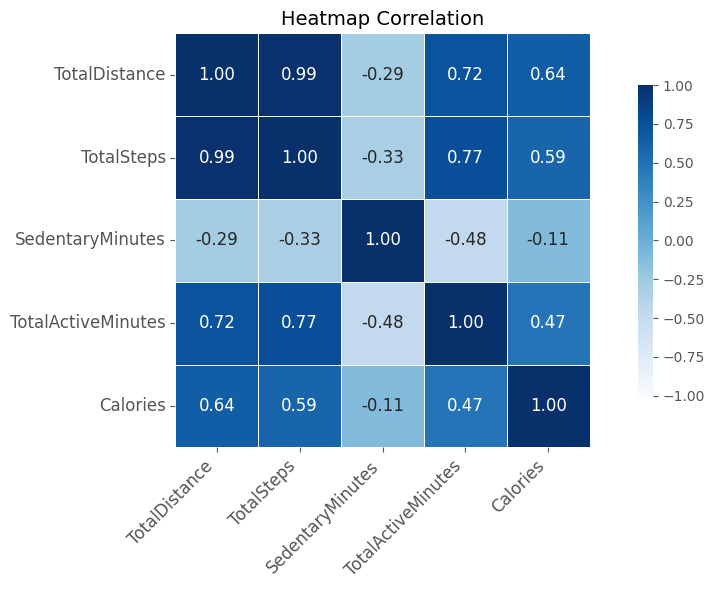

In [56]:
# Heatmap Correlation matrix

# Define correlation features
Corr1 = ["TotalDistance", "TotalSteps", "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

# Compute correlation matrix
corr_matrix = daily_activity[Corr1].corr()

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            linewidths=0.5, 
            cmap="Blues",  # More readable color palette
            vmin=-1, vmax=1,  # Ensure scale consistency
            square=True,       # Make it visually balanced
            cbar_kws={'shrink': 0.75},  # Adjust colorbar size
            annot_kws={"size": 12})  # Improve annotation size

# Improve title formatting
ax.set_title('Heatmap Correlation', fontsize=14)

#  x-axis labels 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


* We can see positive correlation between Calories and total TotalDistance (corr: 0.64), TotalSteps (corr: 0.59), and TotalActiveMinutes (corr: 0.47).
* In contrast, there is negative correlation between Calories and SedentaryMinutes (corr: -0.11).

### 6.2 Comparison of total steps and sedentary minutes to calories burn

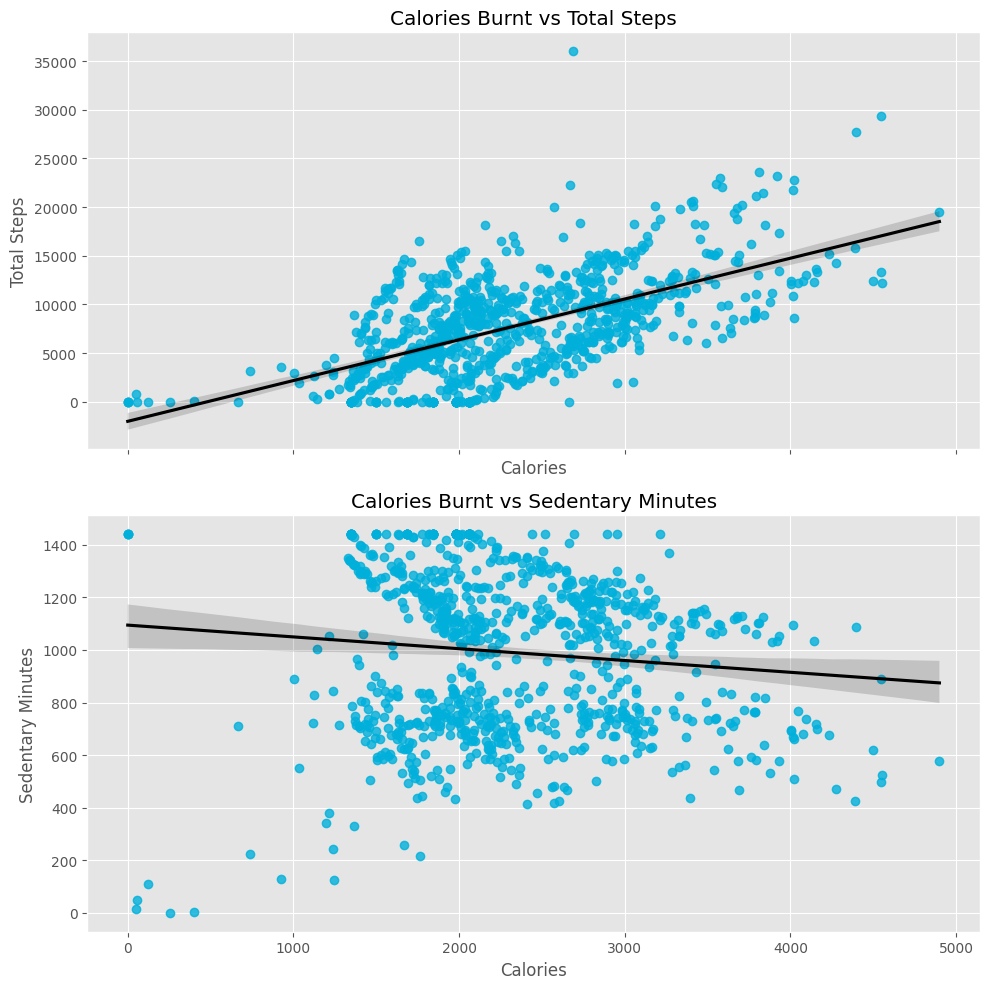

In [57]:
# Comparison of calories burnt between TotalSteps and SedentaryMinutes

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Scatter plot with trend line for Calories vs Total Steps
sns.regplot(x=daily_activity["Calories"], 
            y=daily_activity["TotalSteps"], 
            scatter_kws={"color": "#00b0db"}, 
            line_kws={"color": "black"}, 
            ax=ax0)
ax0.set(title="Calories Burnt vs Total Steps", ylabel="Total Steps")

# Scatter plot with trend line for Calories vs Sedentary Minutes
sns.regplot(x=daily_activity["Calories"], 
            y=daily_activity["SedentaryMinutes"], 
            scatter_kws={"color": "#00b0db"}, 
            line_kws={"color": "black"}, 
            ax=ax1)
ax1.set(title="Calories Burnt vs Sedentary Minutes", ylabel="Sedentary Minutes", xlabel="Calories")

plt.tight_layout()
plt.show()


* The scatter plot above provides relationship between Total values and sedentary minutes to calories burnt.
*  The higher number of TotalSteps, the more calories being burnt. While, sedentary minutes may weakly correlated to the calories being burnt. 

### 6.3 Proportion of sedentary minutes vs total active minutes

We want to compare the proportion of total active minutes and sedentary minutes.

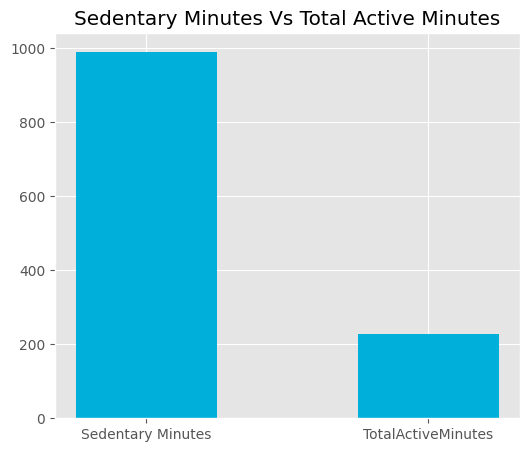

In [58]:
# Comparison of sedentary minutes vs total active minutes
fig, ax = plt.subplots(figsize=(6,5))
x = np.array(["Sedentary Minutes", "TotalActiveMinutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["TotalActiveMinutes"].mean()])

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y, width = 0.5, color = "#00b0db")
plt.show()             

* The bar graph above displays that there is huge gap between Sedentary minutes and total active minutes.
* Majority of users spend more time being inactive (by sitting or lying down) about five times higher than being active.
* This behaviour may reveal that most of them more likely in working class that spend most hours in their desk.

### 6.4 Total daily calories burnt within a week 

Now we want to calculate daily calories burn. This analysis can figure out when most users burn their calories in a week.

In order to observe that, we can make new column of 'WeekDay' based on the 'ActivityHour' as this column can provide time-related (day time) information that we need. This new column will provide more insight for our analysis.

In [59]:
# Adding 'weekday' to calculate weekly calories burned
merge_steps_calories["WeekDay"] = merge_steps_calories["ActivityHour"].dt.day_name()

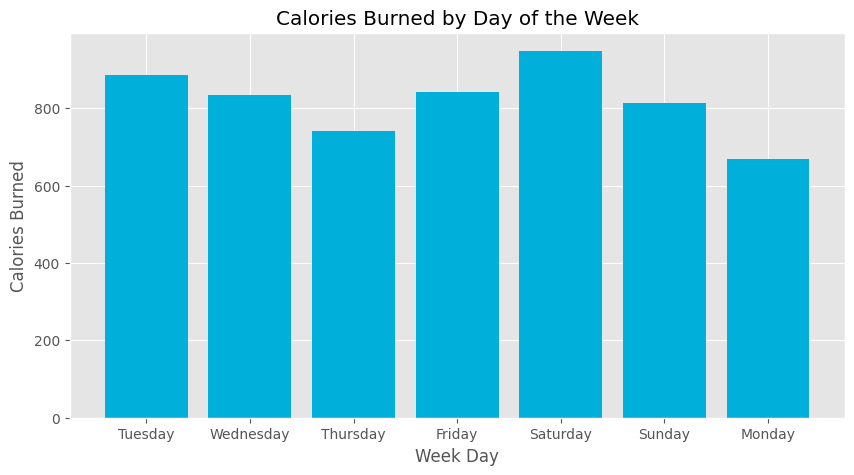

In [60]:
# Calories burned by day of the week
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_steps_calories.WeekDay, merge_steps_calories.Calories, color = "#00b0db")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")

plt.show()

* The bar plot shows most users tend to burn their calories on Saturday. This is understandable, as people have more time do exercise on weekend.
* Oppositely, monday is the day when the least amount of calories being burnt. This probably can be explained as monday can be one of the busiest days for working employees.

### 6.5 Daily total steps

Now we want to compare the daily total steps taken in a week.

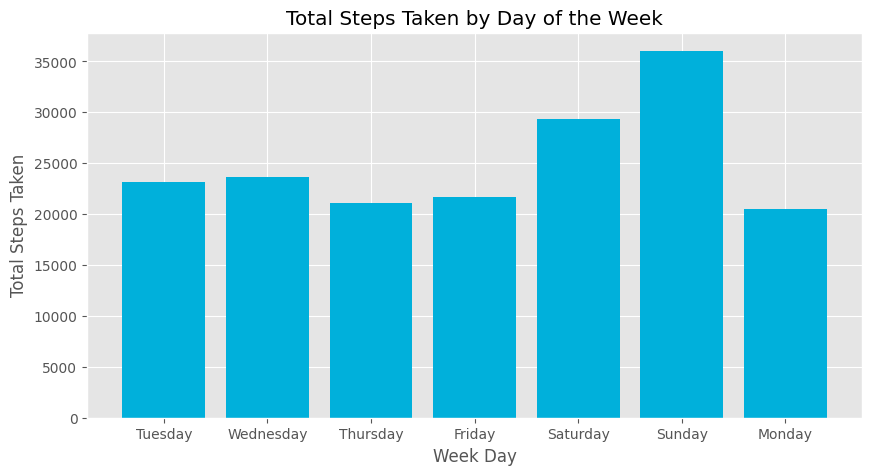

In [61]:
# Total steps by the day of the week
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(daily_activity.WeekDay, daily_activity.TotalSteps, 
        color = "#00b0db")
plt.xlabel("Week Day")
plt.ylabel("Total Steps Taken")
plt.title("Total Steps Taken by Day of the Week")
plt.show()

* The bar graph points that days on weekend (Saturday and Sunday) have higher number of total steps in comparison to weekdays. This is understandable as most users probably spend their weekdays working on offices that do not require them to take more steps. 

### 6.6 Total time asleep

Beside user's active time and total steps, we want to extract insight on how users are resting. We will measure the duration of how user sleep or resting. We will also convert the user sleep time duration from minutes to hours.

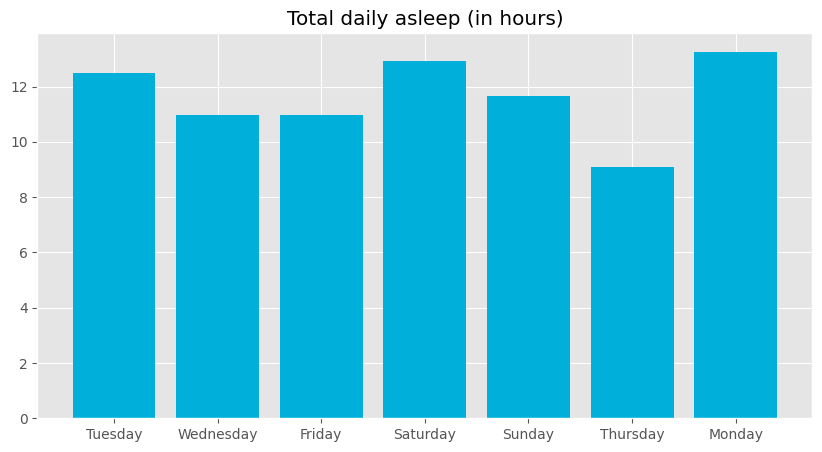

In [62]:

# Total time asleep by day of the week
fig, ax = plt.subplots(figsize=(10,5))
x = merge_data["WeekDay"]
y = merge_data["TotalMinutesAsleep"]/60

plt.title("Total daily asleep (in hours)")
plt.bar(x, y, width = 0.8, color = "#00b0db")
plt.show() 

* The graph above provide information of how user rest in a week. It is important to noted that duration above not only display the information of sleeping time, but may include the duration of other rest activities too such as lying down on bed (without significant movements).
* Based on the graph above, we can see that monday has the highest duration of sleep time. Usually people tend to rest longer when they are more tired. Monday probably can be the busiest time in a week.
* Beside that, we can also see that people have more time to rest on saturday, which also the day when they lost most of calories (e.g., after exercising).

### 6.7 Total steps within a day

Now, we want to find the most and least active hours of the day.

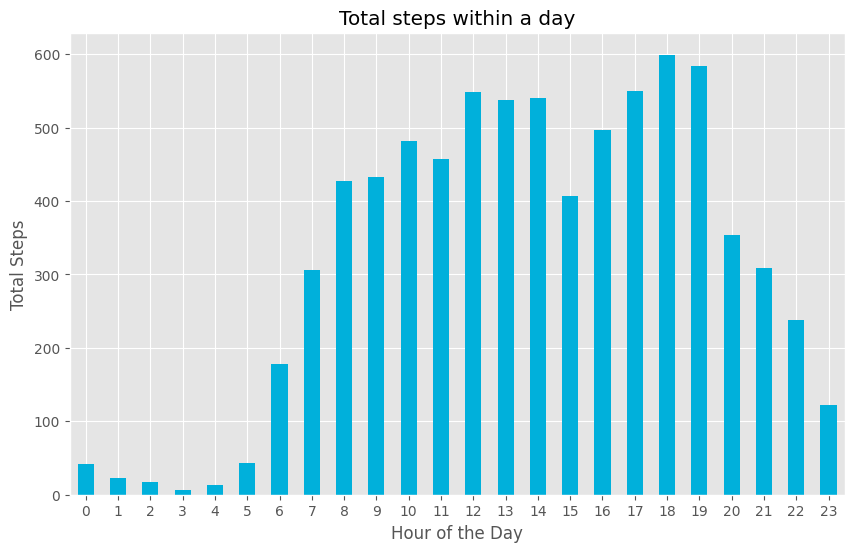

In [63]:
# Total steps within a day
# Least active time of the day for targeted Ads

fig, axs = plt.subplots(figsize=(10, 6))
merge_steps_calories.groupby(merge_steps_calories['DateHour'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='#00b0db', title='Total steps within a day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

The graph describes user total step within a day. Users stars getting active from 8 am to 7 pm. After 8 pm, users activity are continously decreasing as user probably resting. These rest time period can be the recommended time for advertisement. 

## 7. Act

### 7.1 Recommendation

Based on the previous insights of our analysis, we have formulated some actionable recommedations that may improve Bellabeat operational through 'promotion' and 'customer retention'

**Promotion**: 
* The data shows that people are less active between 8 and 10 p.m., just before bedtime. This is the best time for Bellabeat to run ads for maximum impact. Platforms like Google Ads allow businesses to schedule when their ads appear, ensuring they reach the right audience at the right time. Using this strategy, Bellabeat can effectively connect with potential customers while also saving money on advertising costs.

**Retention**:

* Keeping customers engaged is just as important as attracting new ones. Research shows that 80% of customers cancel their subscriptions within two years. To keep users engaged, Bellabeat should provide personalized content that adds value.

* For example, the data shows a strong link between the number of steps taken and calories burned—people who walk more burn more calories. However, many users struggle to reach the recommended 10,000 steps per day for a healthy lifestyle. Bellabeat can support users by sharing useful tips and advice on how to stay active. These can be posted regularly on its website. Additionally, Bellabeat can introduce fun challenges to motivate users to walk more. This will not only encourage engagement but also help users stay on track with their health goals.

* Another key finding is that people spend more time being inactive than active. A sedentary lifestyle is linked to health issues like obesity, heart disease, and stroke. Bellabeat can create educational content—such as blog posts and explainer videos—to inform users about the risks of inactivity and how to stay healthy. This also presents an opportunity to promote Bellabeat’s other products, like the Bellabeat app, which provides health insights, and Bellabeat Time, which syncs with the app to track daily well-being.